In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dt=pd.read_csv("exams.csv")
dt

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [4]:
dt["test preparation course"].unique()

array(['completed', 'none'], dtype=object)

In [5]:
dt.shape

(1000, 8)

In [6]:
dt.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
dt.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [8]:
dt.index

RangeIndex(start=0, stop=1000, step=1)

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
dt.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']
for i in l:
    dt[i]=le.fit_transform(dt[i])
dt

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,37,40,51
1,1,3,0,1,1,74,63,60
2,0,3,4,0,1,35,46,50
3,1,1,4,0,1,48,40,36
4,0,3,0,1,1,61,55,59
...,...,...,...,...,...,...,...,...
995,1,2,4,1,1,55,47,44
996,1,2,4,1,1,58,36,39
997,0,0,2,1,0,45,56,59
998,1,4,2,1,1,58,42,35


In [12]:
corrMatrix = dt.corr()
corrMatrix

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.048978,0.025942,0.015708,0.032641,0.195892,-0.216219,-0.282765
race/ethnicity,0.048978,1.000000,0.042983,0.006608,-0.004918,0.236400,0.154106,0.167377
parental level of education,0.025942,0.042983,1.000000,0.038919,0.011904,-0.094115,-0.100773,-0.120694
lunch,0.015708,0.006608,0.038919,1.000000,0.093498,0.373166,0.242218,0.235815
test preparation course,0.032641,-0.004918,0.011904,0.093498,1.000000,-0.119532,-0.222999,-0.322142
math score,0.195892,0.236400,-0.094115,0.373166,-0.119532,1.000000,0.811268,0.789027
reading score,-0.216219,0.154106,-0.100773,0.242218,-0.222999,0.811268,1.000000,0.948740
writing score,-0.282765,0.167377,-0.120694,0.235815,-0.322142,0.789027,0.948740,1.000000


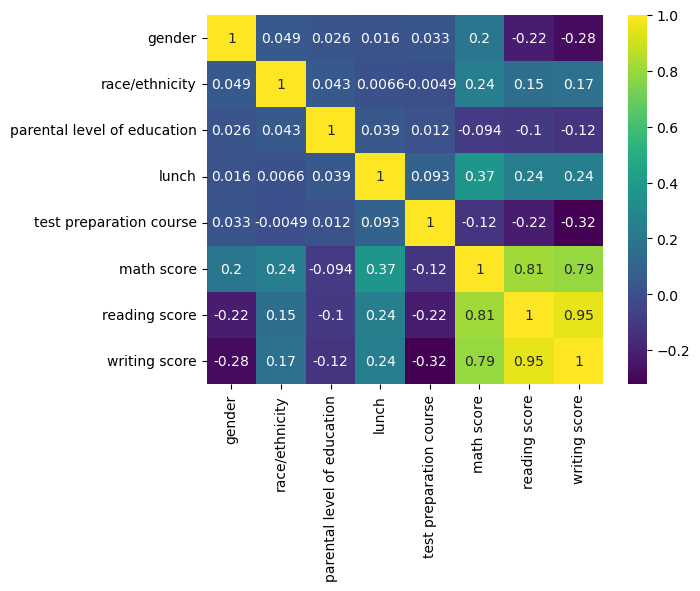

In [13]:
import seaborn as sns
sns.heatmap(corrMatrix, annot=True, cmap="viridis") 
plt.show()

In [14]:
x=dt.drop("math score",axis=1)
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,3,4,1,0,40,51
1,1,3,0,1,1,63,60
2,0,3,4,0,1,46,50
3,1,1,4,0,1,40,36
4,0,3,0,1,1,55,59
...,...,...,...,...,...,...,...
995,1,2,4,1,1,47,44
996,1,2,4,1,1,36,39
997,0,0,2,1,0,56,59
998,1,4,2,1,1,42,35


In [15]:
y=dt["math score"]
y

0      37
1      74
2      35
3      48
4      61
       ..
995    55
996    58
997    45
998    58
999    36
Name: math score, Length: 1000, dtype: int64

C:\Users\Lenovo\a\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


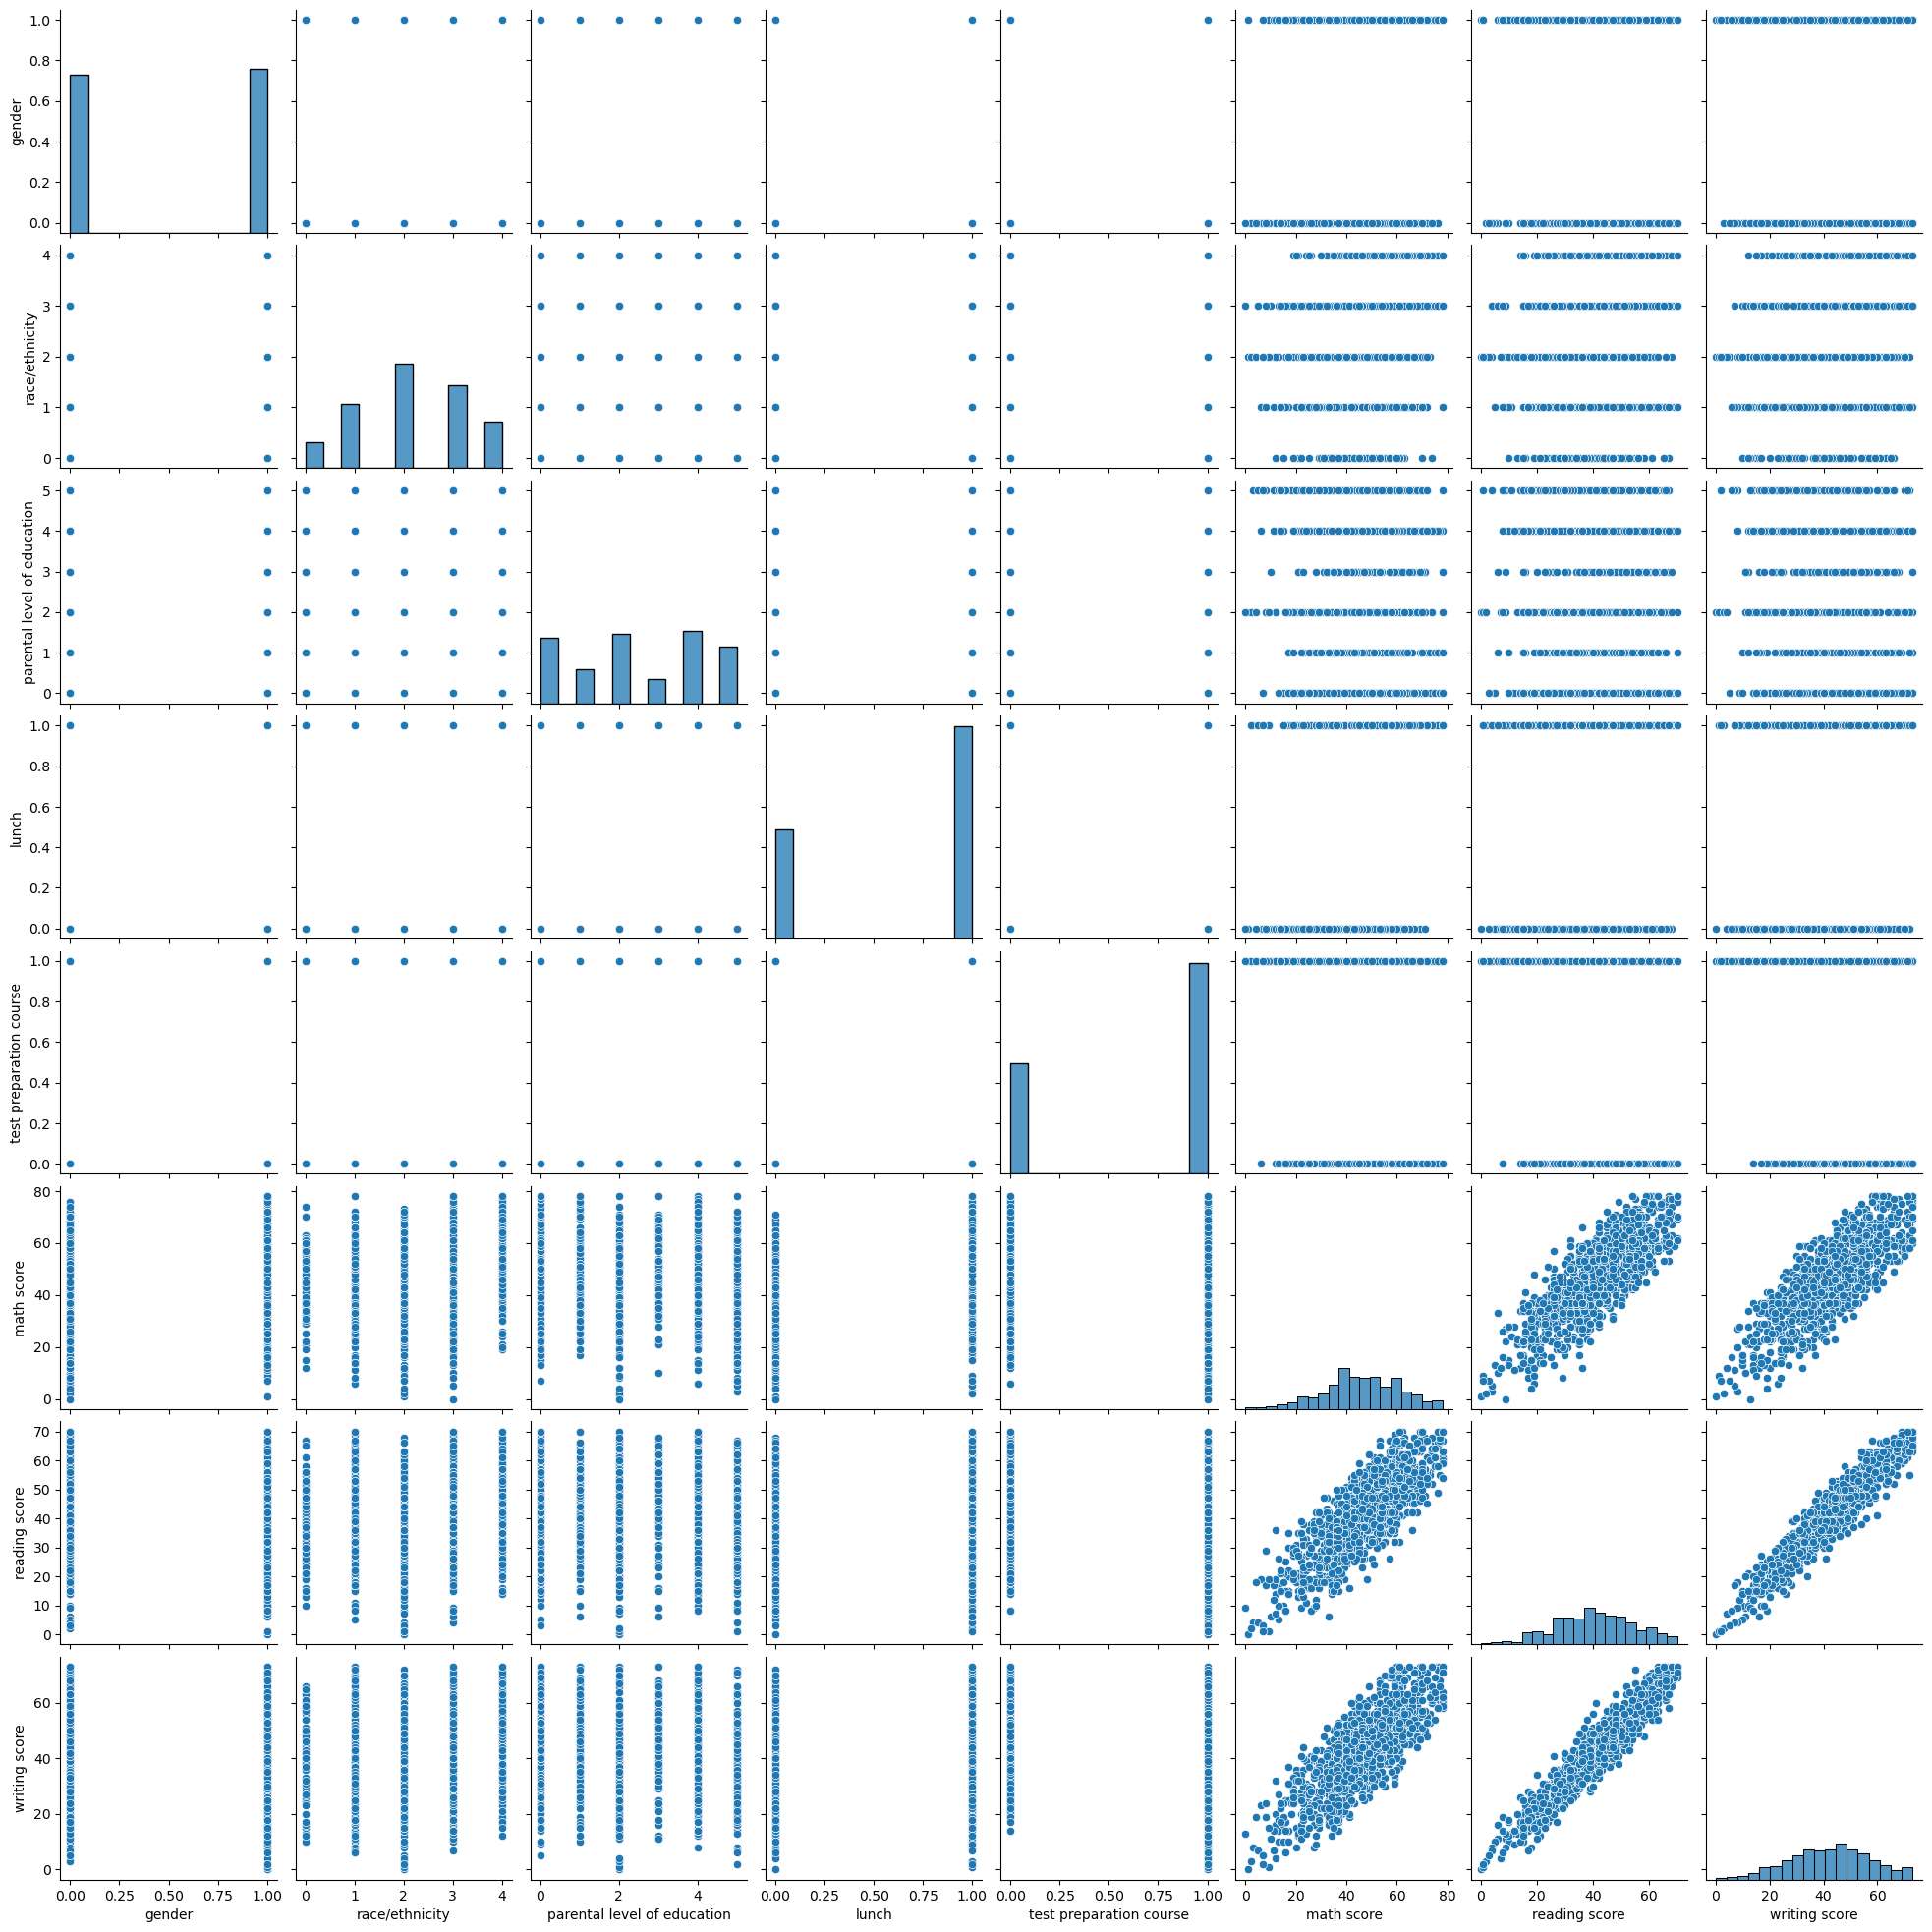

In [74]:
import seaborn as sns
sns.pairplot(dt)
plt.show()

<Axes: xlabel='reading score'>

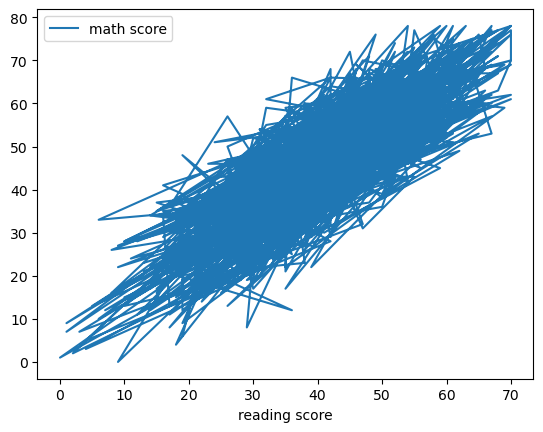

In [16]:
dt.plot("reading score","math score")

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=20)

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
regr=DecisionTreeRegressor()

In [21]:
regr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy=(regr.score(xtest,ytest)*100)
accuracy

68.76301921962656

In [24]:
predict=(regr.score(xtrain,ytrain)*100)
predict

99.99571091008563

In [25]:
v=[[0,3,4,1,0,40,51]]
w=regr.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([37.])

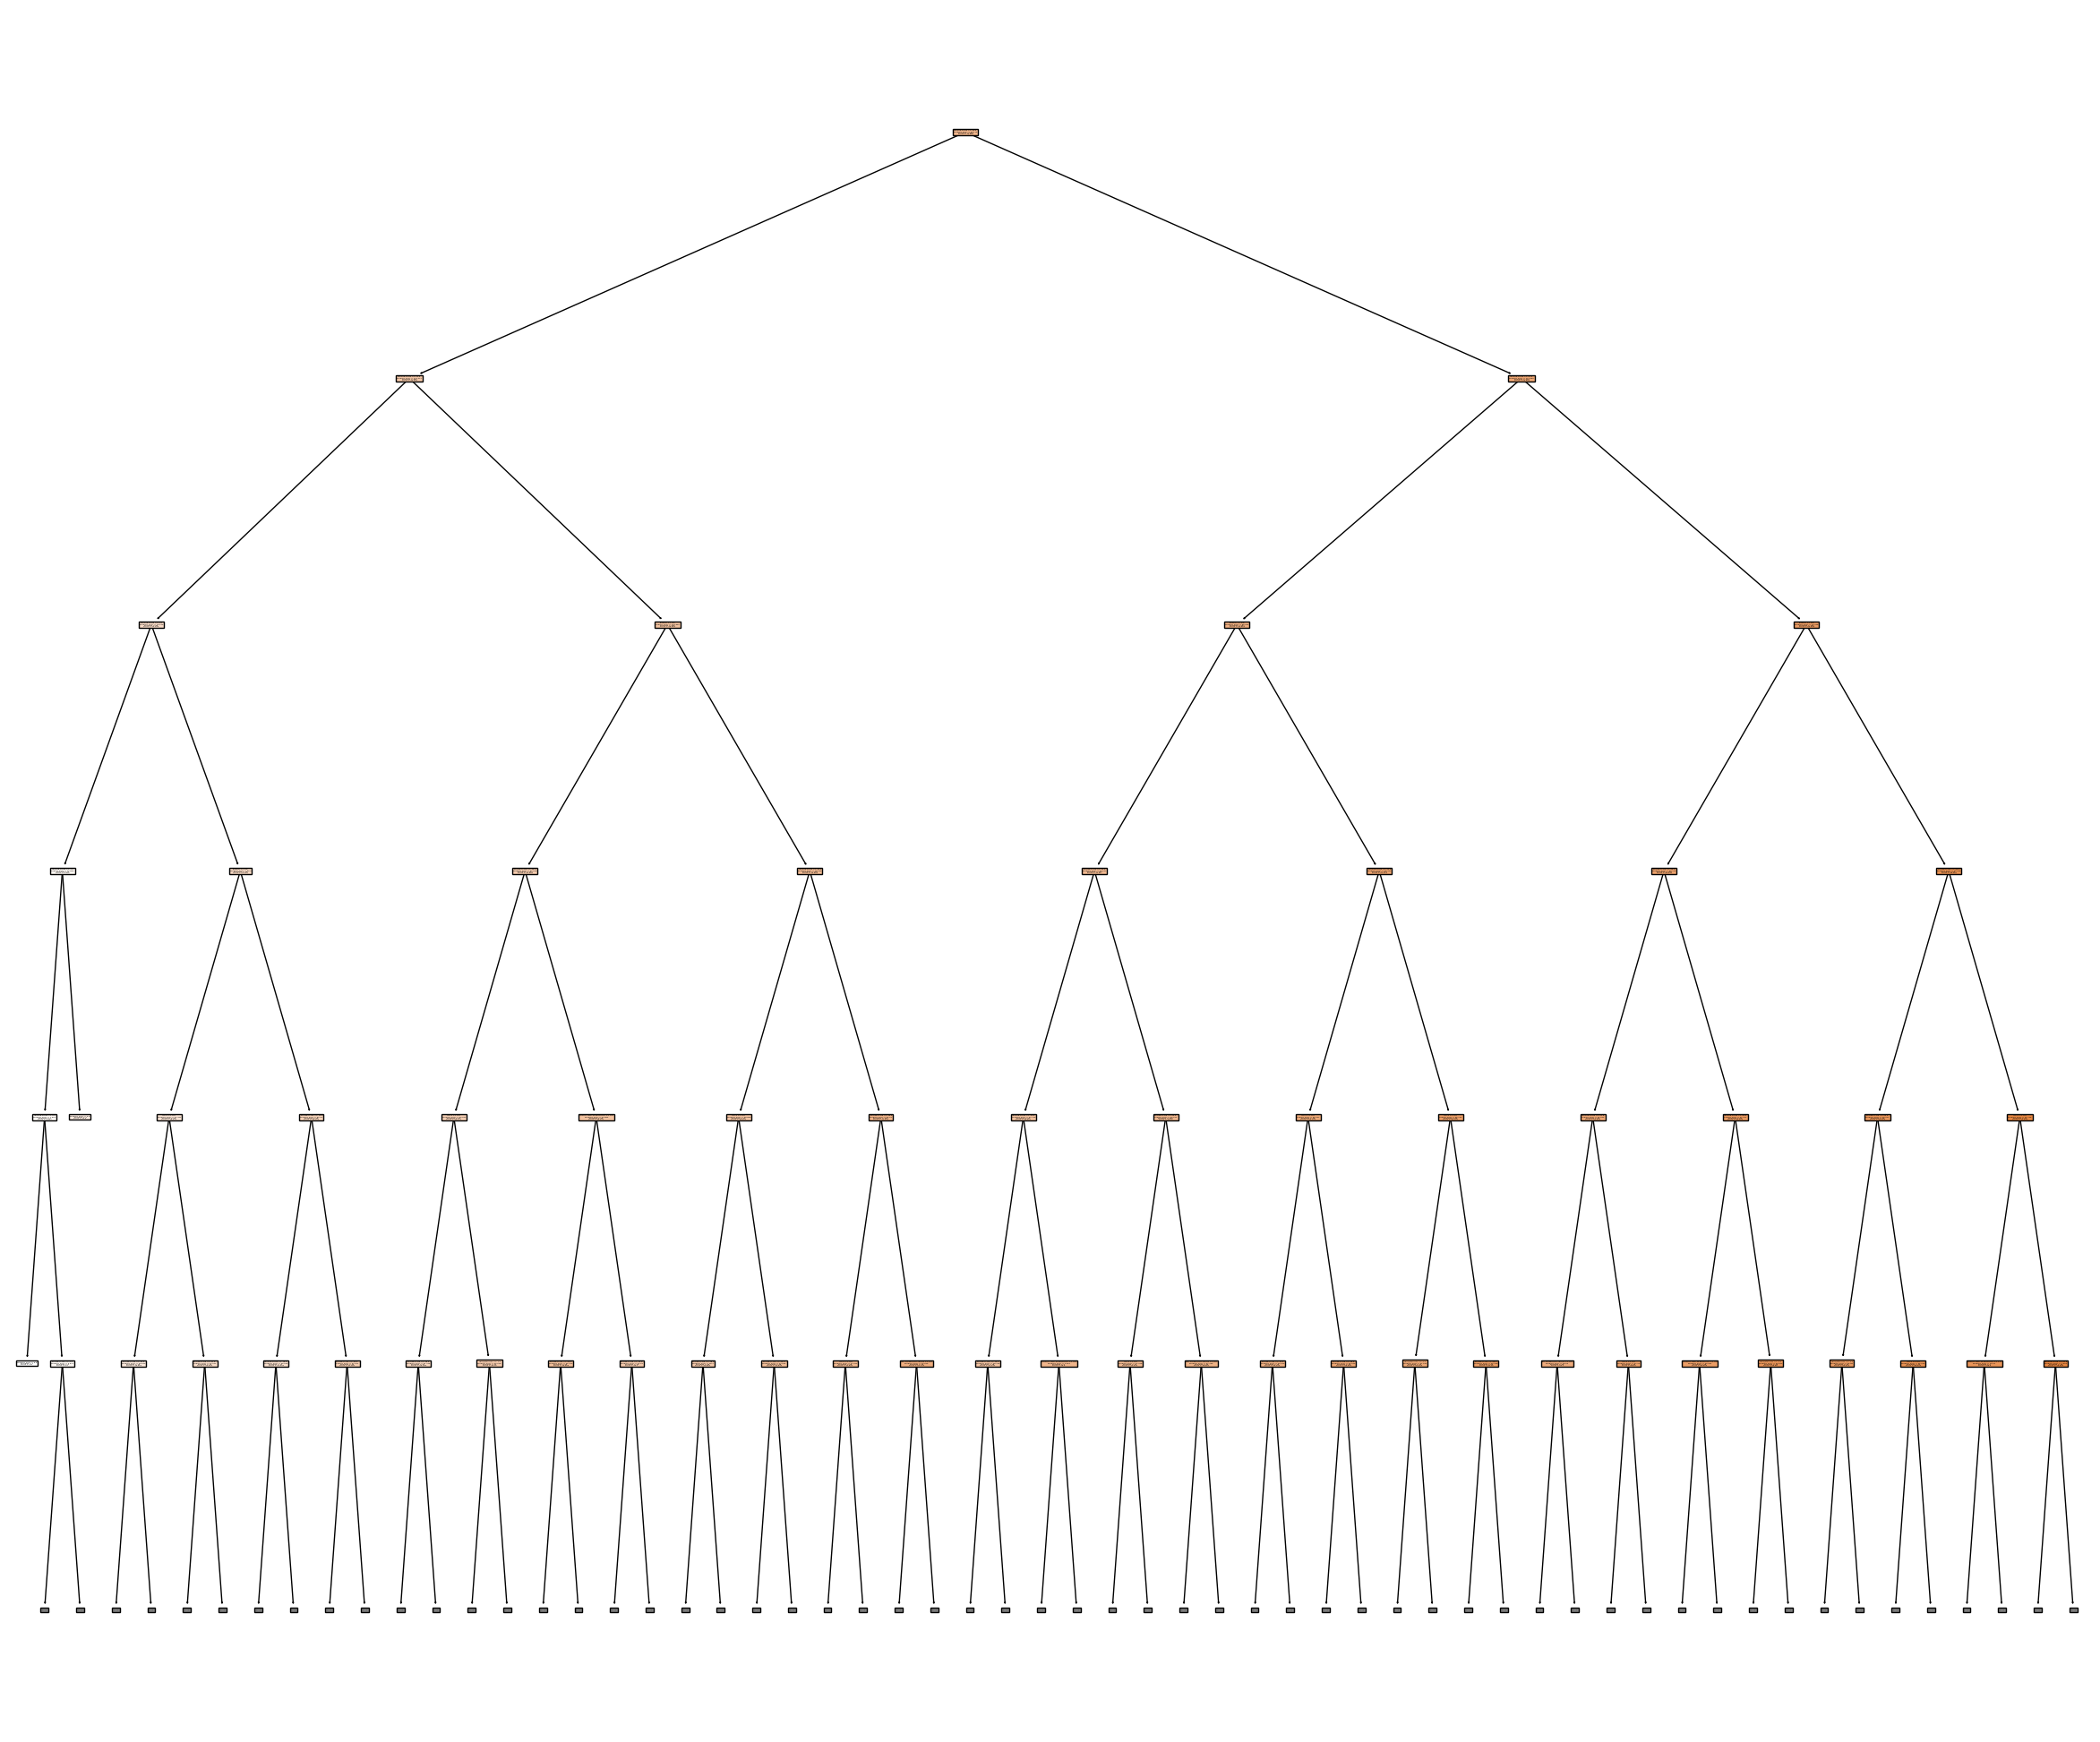

In [26]:
from sklearn import tree
plt.figure(figsize=(30,25))
tree.plot_tree(regr,feature_names=x.columns.tolist(),filled=True,max_depth=5)
plt.show()

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf=RandomForestRegressor()

In [29]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [30]:
a1=(rf.score(xtest,ytest)*100)
a1

81.50254012098247

In [31]:
p1=(rf.score(xtrain,ytrain)*100)
p1

97.8575157739547

In [32]:
v=[[0,3,4,1,0,40,51]]
w=rf.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([39.5])

In [33]:
from sklearn.svm import SVR

In [34]:
r=SVR()

In [35]:
r.fit(xtrain,ytrain)

SVR()

In [36]:
a2=(r.score(xtest,ytest)*100)
a2

66.48106372296718

In [37]:
p2=(r.score(xtrain,ytrain)*100)
p2

63.54090868704122

In [38]:
v=[[0,3,4,1,0,40,51]]
w=r.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([49.52059428])

In [39]:
#classification

In [40]:
x1=dt.drop("test preparation course",axis=1)
x1

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,0,3,4,1,37,40,51
1,1,3,0,1,74,63,60
2,0,3,4,0,35,46,50
3,1,1,4,0,48,40,36
4,0,3,0,1,61,55,59
...,...,...,...,...,...,...,...
995,1,2,4,1,55,47,44
996,1,2,4,1,58,36,39
997,0,0,2,1,45,56,59
998,1,4,2,1,58,42,35


In [41]:
y1=dt["test preparation course"]
y1

0      0
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    1
999    1
Name: test preparation course, Length: 1000, dtype: int32

In [43]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.20,random_state=20)

In [44]:
from sklearn.tree import DecisionTreeClassifier
clss=DecisionTreeClassifier(criterion="entropy")

In [45]:
clss.fit(x1train,y1train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
d1=clss.predict(x1test)
d1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1])

In [47]:
a3=accuracy_score(y1test,d1)*100
a3

67.5

In [48]:
d2=clss.predict(x1train)
d2

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [49]:
a4=accuracy_score(y1train,d2)*100
a4

100.0

In [51]:
v=[[0,3,4,1,37,40,51]]
w=clss.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [52]:
if w==0:
    print("completed")
else:
    print("none")

completed


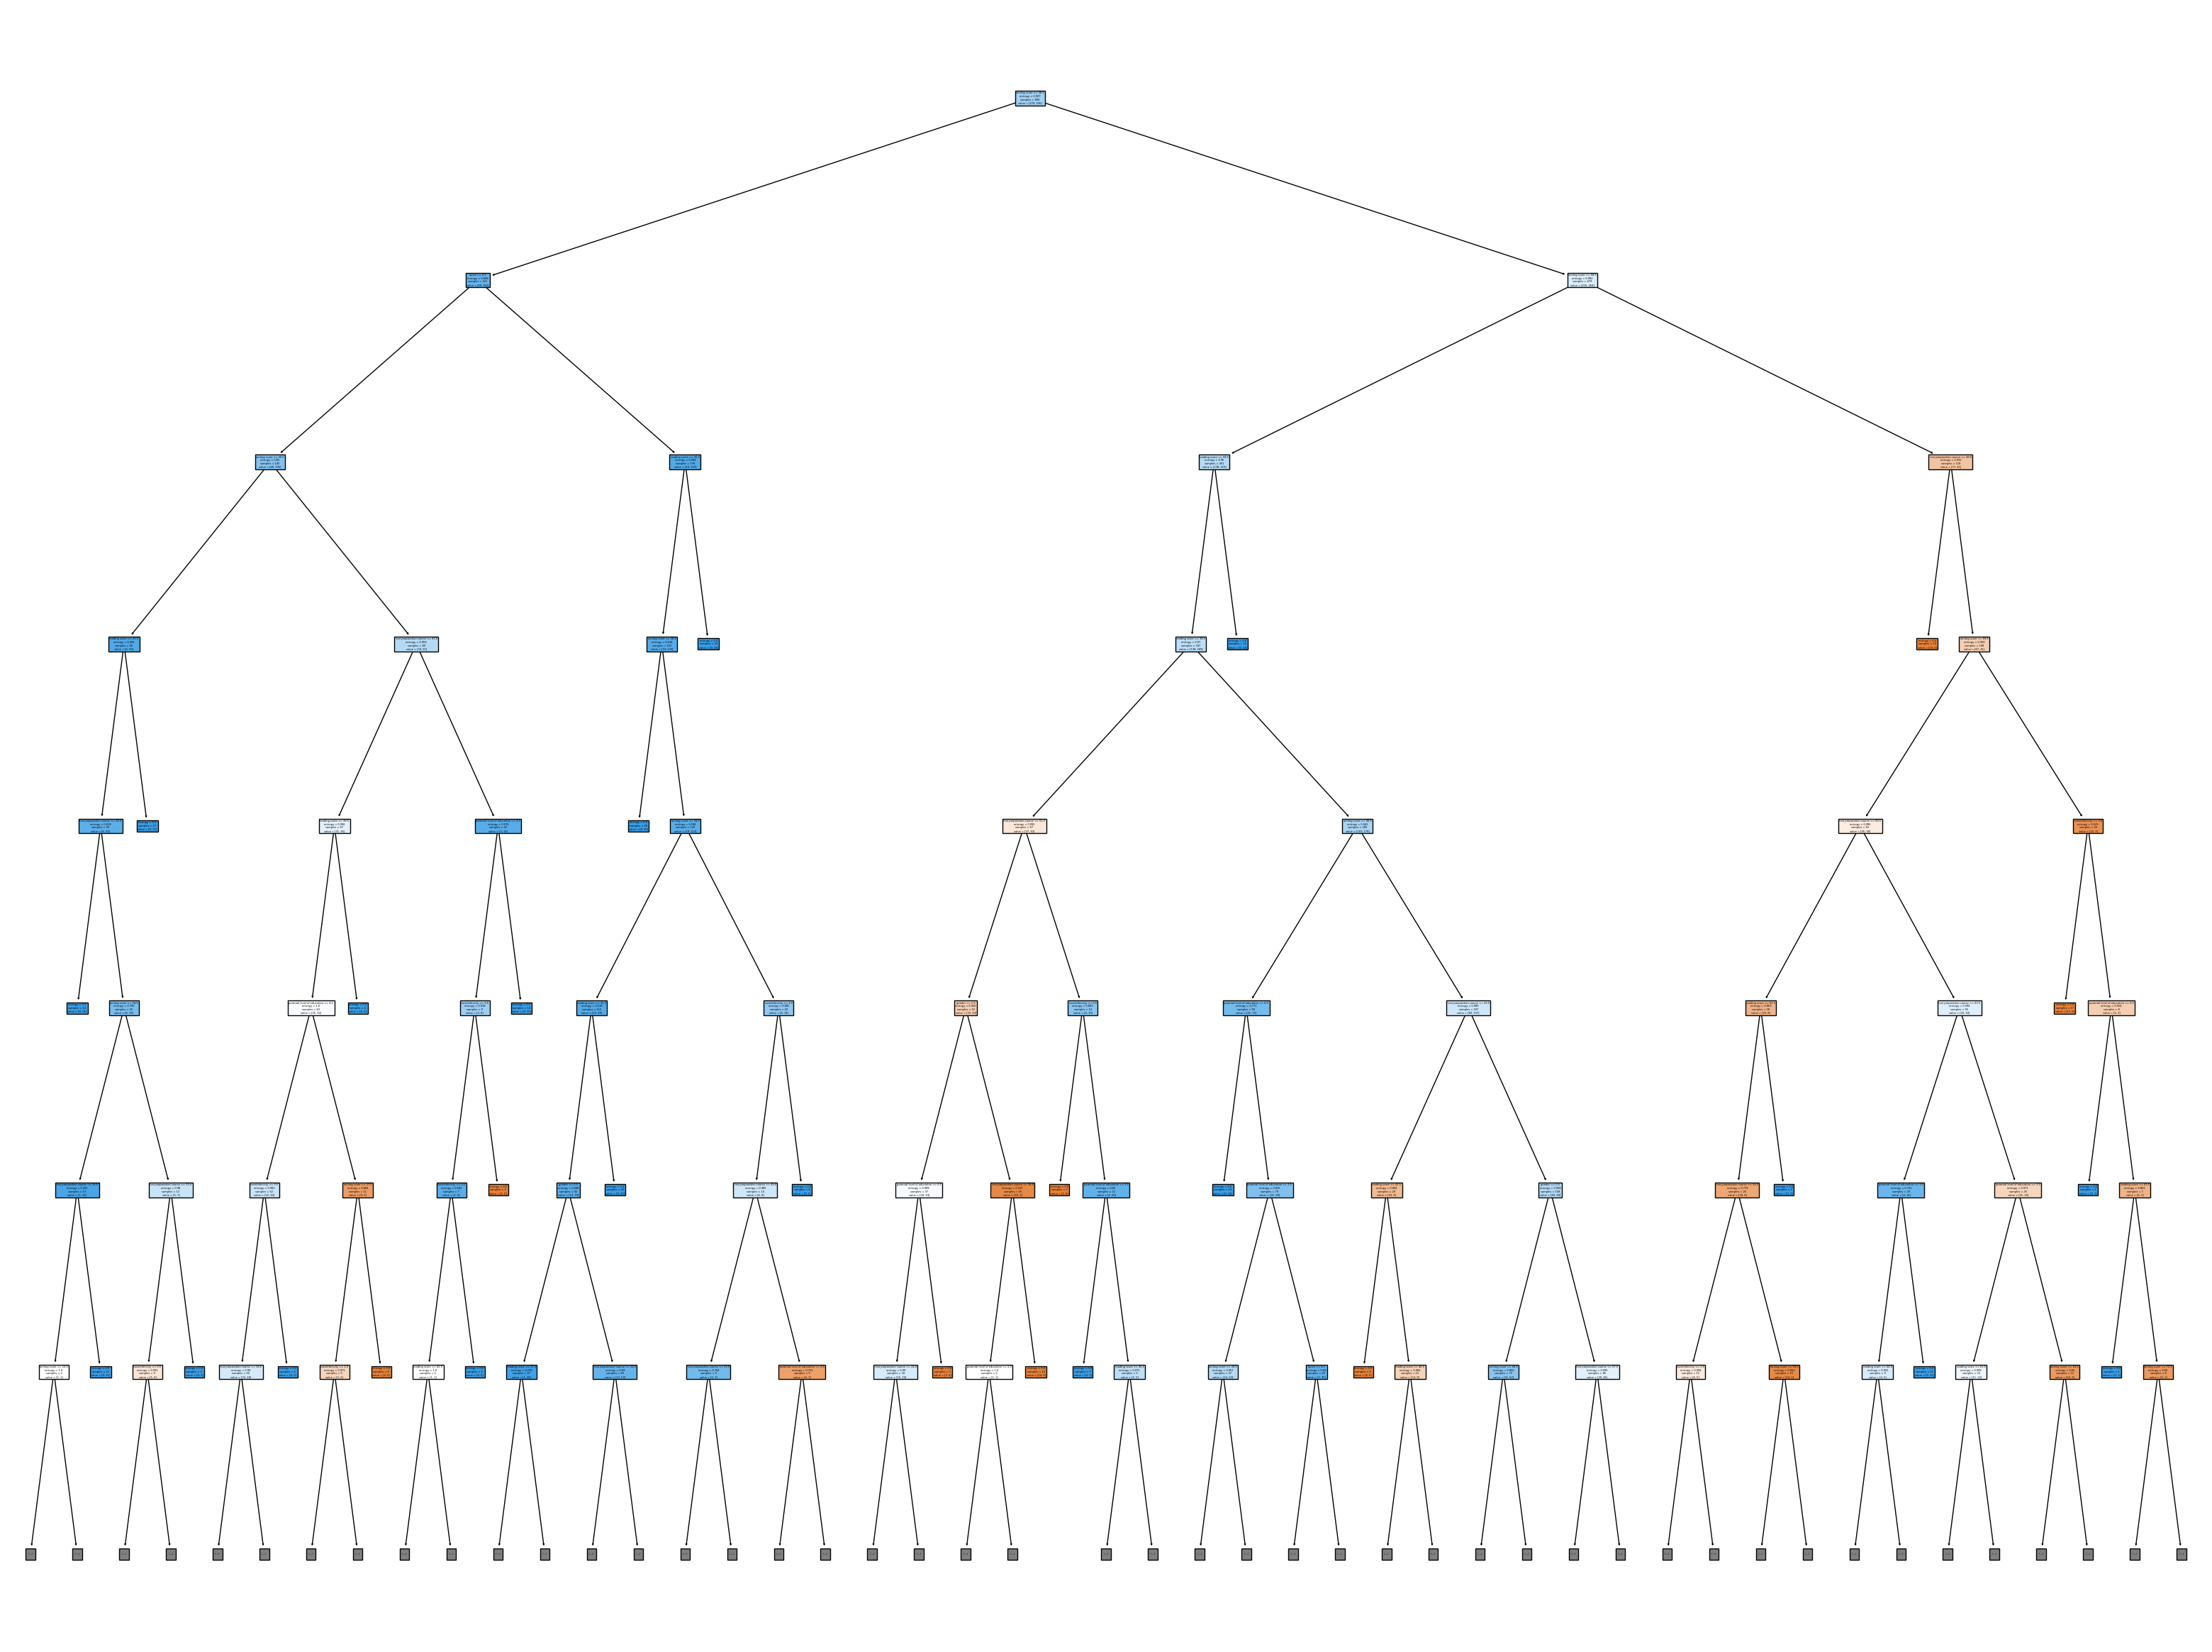

In [55]:
from sklearn import tree
plt.figure(figsize=(40,30))
tree.plot_tree(clss,feature_names=x.columns.tolist(),filled=True,max_depth=7)
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [57]:
rf.fit(x1train,y1train)

RandomForestClassifier()

In [58]:
d3=rf.predict(x1test)
d3

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [59]:
a5=accuracy_score(y1test,d3)*100
a5

70.5

In [60]:
d4=rf.predict(x1train)
d4

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [61]:
a6=accuracy_score(y1train,d4)*100
a6

100.0

In [62]:
v=[[0,3,4,1,37,40,51]]
w=rf.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [63]:
if w==0:
    print("completed")
else:
    print("none")

completed


In [64]:
from sklearn.svm import SVC

In [65]:
c=SVC()

In [66]:
c.fit(x1train,y1train)

SVC()

In [67]:
d5=c.predict(x1test)
d5

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [68]:
a7=accuracy_score(y1test,d5)*100
a7

69.0

In [69]:
d6=c.predict(x1train)
d6

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [70]:
a8=accuracy_score(y1train,d6)*100
a8

71.375

In [71]:
v=[[0,3,4,1,37,40,51]]
w=c.predict(v)
w

C:\Users\Lenovo\a\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [73]:
if w==0:
    print("completed")
else:
    print("none")

none
